# Insecticide usage trends in California Pesticide Use Reports
## 1990 - 2016

#### 1) Combine data into one file
cat */udc*txt > pur_1990_2016.txt

#### 2) Copy a header line and then remove all the headers (then add one back in)
grep -v use_no,prodno,chem_code pur_1990_2016.txt

In [ ]:
import csv

### Remove extra white space in elements
with open('pur_1990_2016.txt_noheaders') as f:
    reader = csv.reader(f)
    for row in reader:
        row = [r.strip() for r in row]
        print(",".join(row))
        # > pur_1990_2016.txt_noheaders_nowhitespace

# At this point you get errors when trying to input the data as a dataframe.
### There appears to be misformated rows and rows with missing data (e.g. no chemical code)

In [8]:
# print out rows with no chem_code
f = open("no_chem_code.csv", "w")

for line in open("pur_1990_2016.txt_noheaders_nowhitespace"):
    i=line.strip().split(",")
    if i[2] == "":   # position of chem_code
        f.write("".join([line.strip(),'\n']))
        #print line.strip() # > no_chem_code.csv
f.close()


In [4]:
# Show submissions with no chem code by year. Its about 17% of the total each year.
D = {}
total = 0
for line in open("no_chem_code.csv"):
    i=line.strip().split(",")
    yr = i[13].split('/')[-1]
    if yr == '':
        continue

    if yr not in D:
        D[yr]=0
    D[yr]+=1 
    total += 1
for year in sorted(D.keys()):
    print(year, D[year])

print('total', total)

2001 85
2002 235
2003 439570
2004 434859
2005 468174
2006 497628
2007 466322
2008 458121
2009 454936
2010 529448
2011 575894
2012 605906
2013 662104
2014 689913
2015 739172
2016 797361
total 7819728


In [ ]:

D = {}
total = 0
for line in open("pur_1990_2016.txt_noheaders_nowhitespace"):
    i=line.strip().split(",")

    yr = i[13].split('/')[-1]
    if yr == '':
        continue # yes some applications have no year.

    if yr not in D:
        D[yr]=0
    D[yr]+=1
    total += 1

    
for year in D:
    print(year, D[year])

print('total', total)



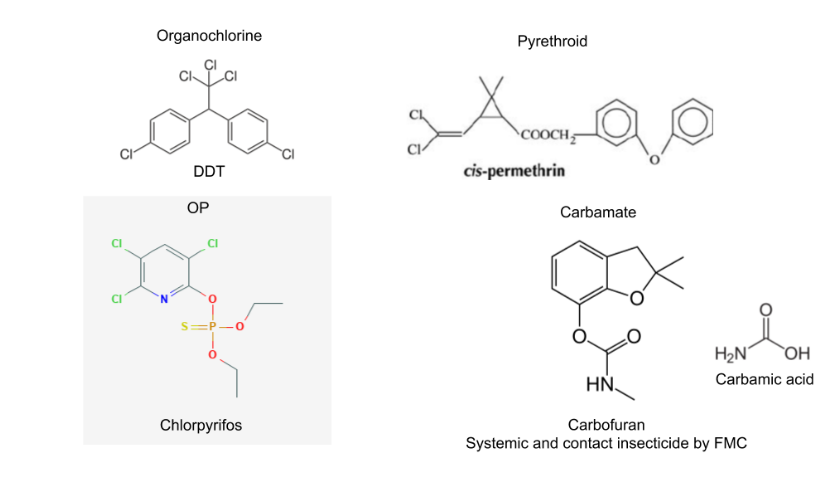

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread("ochem.png")
plt.figure(num=None, figsize=(16, 8), dpi=80)
plt.axis('off')

plt.imshow(image)
plt.show()



In [21]:
import math
import matplotlib.pyplot as P
import numpy as np
import sys
import pandas as pd
import seaborn as sns
%matplotlib inline


# This function outputs a barplot and 2 trendline plots for annual usage by acres and pounds of chemical.
# chem_data_file is delimited by: ";"
def pesticide_plotter(chem_data_file, pesticide_class_str, chem_list_keep):
    # chem name dict
    D={}
    for line in open("chem_key2.txt"):
        i=line.strip().split(';')
        if i[0]=="CHEM_CODE":
            continue
        if len(i)==2:
            D[int(i[0])]=i[1]        


    #create figures
    fig1 = P.figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')
    ax1 = fig1.add_subplot(111)
    ax1.yaxis.tick_left()
    ax1.yaxis.set_label_position("left")
    ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
    ax2.yaxis.tick_right()
    ax2.yaxis.set_label_position("right")



    #Input the data
    pyr_df = pd.read_table(chem_data_file,delimiter=";")
    pyr_df.columns = ['yr', 'mo', 'chem','unit',"application#","amounts","total_acres","unit_lbs","applic_#",'amounts2','total_lbs']
    # join chem_ID and name for display
    pyr_df["NAME"] = pyr_df["chem"].astype(str).str.cat(pyr_df['chem'].map(D), sep='_')

    # Limit to 1990 and beyond
    pyr_df = pyr_df.loc[pyr_df['yr']>1989]

    pyr_df_chem = pyr_df.groupby('NAME').sum()
    #print(pyr_df_chem)

    pyr_df_chem['lbs'] = pyr_df_chem['total_lbs'] / 1000000 # make human readable
    pyr_df_chem = pyr_df_chem.loc[pyr_df_chem['lbs']>.01] # Filter out low use chemicals

    pyr_df_chem['acreage'] = pyr_df_chem['total_acres'] / 1000000 # make human readable

    pyr_sorted_df = pyr_df_chem.sort_values(by=['lbs'])
    pyr_sorted_df = pyr_sorted_df.reset_index()

    pyr_sorted_df.plot(kind='bar',x='NAME',y='lbs', ax=ax1, color='green')
    pyr_sorted_df.plot(kind='bar',x='NAME',y='acreage', ax=ax2, color='k', alpha=.4)
    ax2.legend(loc=9, fontsize=18)
    ax1.legend(loc=2, fontsize=18)
    ax2.set_ylabel("Acres applied (millions)", fontsize=18)
    ax1.set_ylabel("lbs applied (millions)", fontsize=18)
    ax1.set_title("Relative %s usage (1990 - 2016)" % (pesticide_class_str), fontsize=20)




    #create figures
    # annual acres
    fig2 = P.figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')
    ax3 = fig2.add_subplot(111)
    ax3.yaxis.tick_left()
    ax3.yaxis.set_label_position("left")
    ax4 = fig2.add_subplot(111, sharex=ax3, frameon=False)
    ax4.yaxis.tick_right()
    ax4.yaxis.set_label_position("right")


    # annual lbs
    fig3 = P.figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')
    ax5 = fig3.add_subplot(111)
    ax5.yaxis.tick_left()
    ax5.yaxis.set_label_position("left")
    ax6 = fig3.add_subplot(111, sharex=ax5, frameon=False)
    ax6.yaxis.tick_right()
    ax6.yaxis.set_label_position("right")


    total = pyr_df.groupby('yr').sum()
    total = total.reset_index()
    #total = total.loc[total['yr']>=1990]
    #change units to /Million
    total['acre_M'] = total['total_acres']/1000000
    total['lbs_M'] = total['total_lbs']/1000000

    # Fig 2 populated with acreage data 
    # all data
    total.plot(kind='line',x='yr',y='acre_M', color='k', ax=ax3,lw=6, label="total_acres")

    # Fig 3 populated with lb data 
    # all data
    total.plot(kind='line',x='yr',y='lbs_M', color='k', ax=ax5,lw=6, label="total_lbs")


    #Here is a list of the top 9 pyr
    #keep = [2008,2297,2321,2300,3866,2223,3956,2171,2234]
    keep = chem_list_keep
    count=0
    for chem in keep:
        count+=1
        pyr=pyr_df.loc[pyr_df['chem']==chem].groupby('yr').sum()
        pyr = pyr.reset_index()
        #pyr = pyr.loc[pyr['yr']>=1990]
        pyr['acre_M'] = pyr['total_acres']/1000000
        pyr['lbs_M'] = pyr['total_lbs']/1000000


        if count<6: # add linestyle so colorspace doesn't overlap
            pyr.plot(kind='line',x='yr',y='acre_M', ax=ax4,lw=3, linestyle='-',label=code_D[str(chem)])
            pyr.plot(kind='line',x='yr',y='lbs_M', ax=ax6,lw=3, linestyle='-',label=code_D[str(chem)])

        else:
            pyr.plot(kind='line',x='yr',y='acre_M', ax=ax4,lw=3, linestyle='--',label=code_D[str(chem)])
            pyr.plot(kind='line',x='yr',y='lbs_M', ax=ax6,lw=3, linestyle='--',label=code_D[str(chem)])



    # set labels
    ax3.set_title("Annual %s usage by acreage (DPR)" % (pesticide_class_str),fontsize=18)
    ax5.set_title("Annual %s usage by pounds" % (pesticide_class_str),fontsize=18)
    ax3.set_ylabel("Millions of acres total",fontsize=18)
    ax4.set_ylabel("Millions of acres per chemical",fontsize=18)
    ax5.set_ylabel("Millions of lbs. total",fontsize=18)
    ax6.set_ylabel("Millions of lbs. per chemical",fontsize=18)

    ax3.set_xlim(1989,2017)
    ax5.set_xlim(1989,2017)
    ax3.legend(loc=1,fontsize=18)
    ax4.legend(loc=2,fontsize=18)
    ax5.legend(loc=2,fontsize=18)
    ax6.legend(loc=9,fontsize=18)
    P.show()

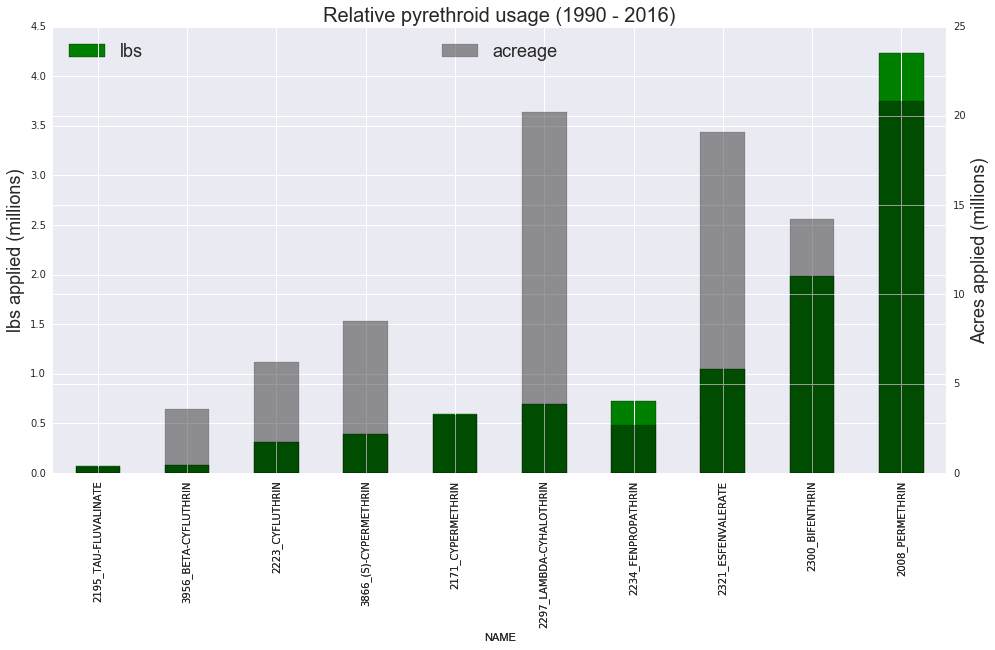

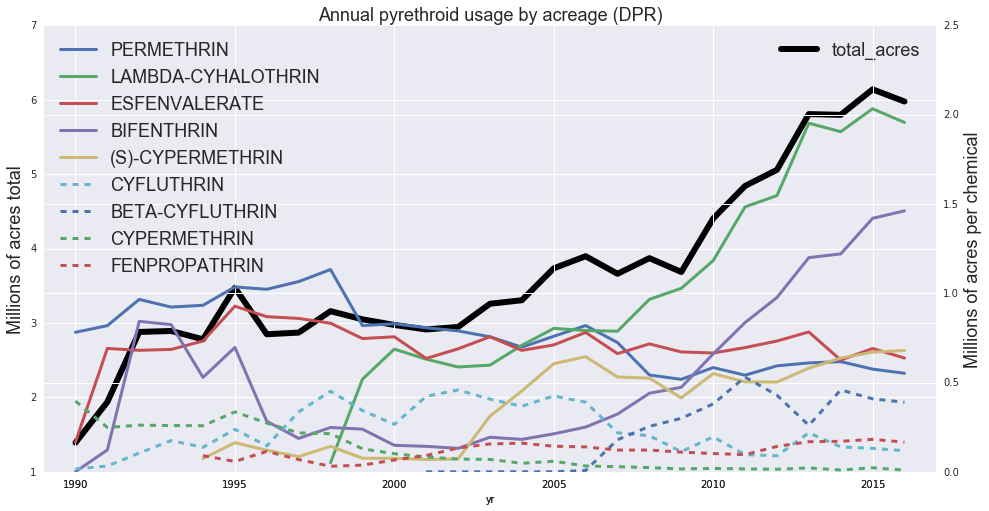

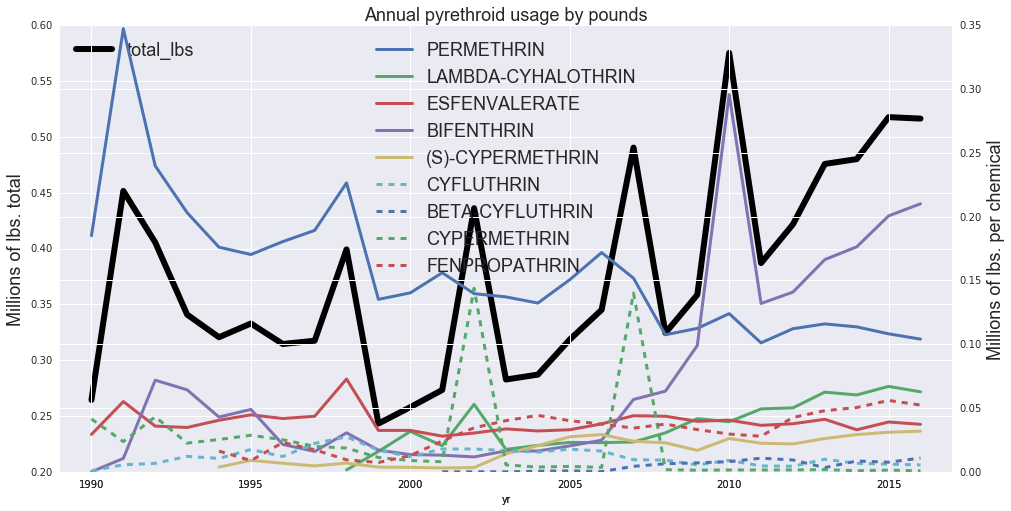

In [22]:
#Pyrethroids 
import math
import matplotlib.pyplot as P
import numpy as np
import sys
import pandas as pd
import seaborn as sns
%matplotlib inline

pyr_keep = [2008,2297,2321,2300,3866,2223,3956,2171,2234]

pesticide_plotter("pyr_yr_mo.data", "pyrethroid", pyr_keep)

## lambda-cyhalothrin is a mixture of isomers of cyhalothrin
## Syngenta held the patent for lambda-cyhalothrin which expired in most major markets in 2003.
## moderate toxicity at LD50 79mb/kg (below 50 is highly toxic)

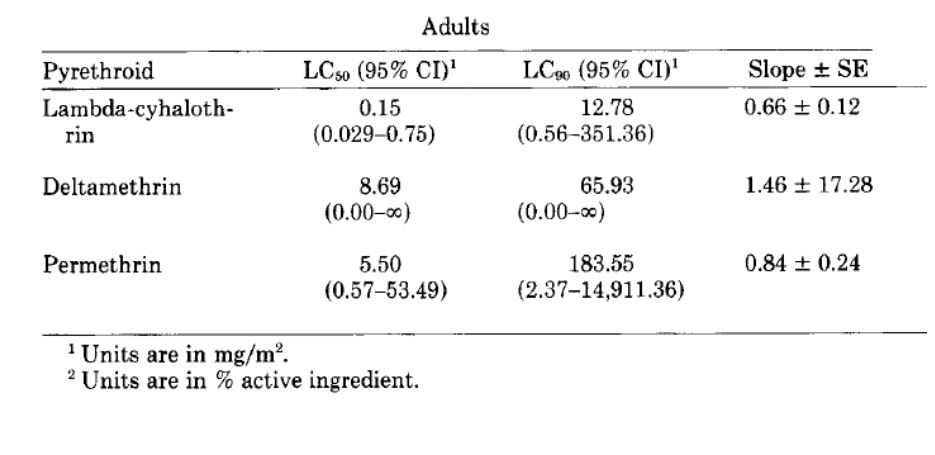

In [153]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread("cyhalothrin.png")
P.figure(num=None, figsize=(16, 8), dpi=80)
P.axis('off')

plt.imshow(image)
plt.show()

#Sulaiman et al. 1991 (from Malaysia)
# Ae. albopictus adults

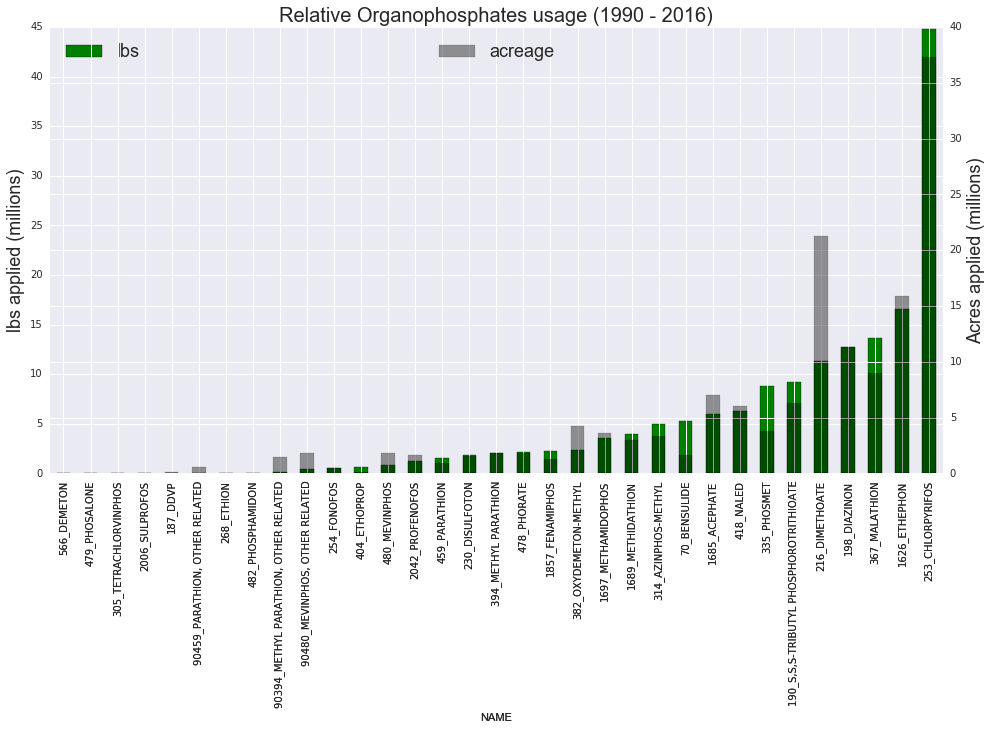

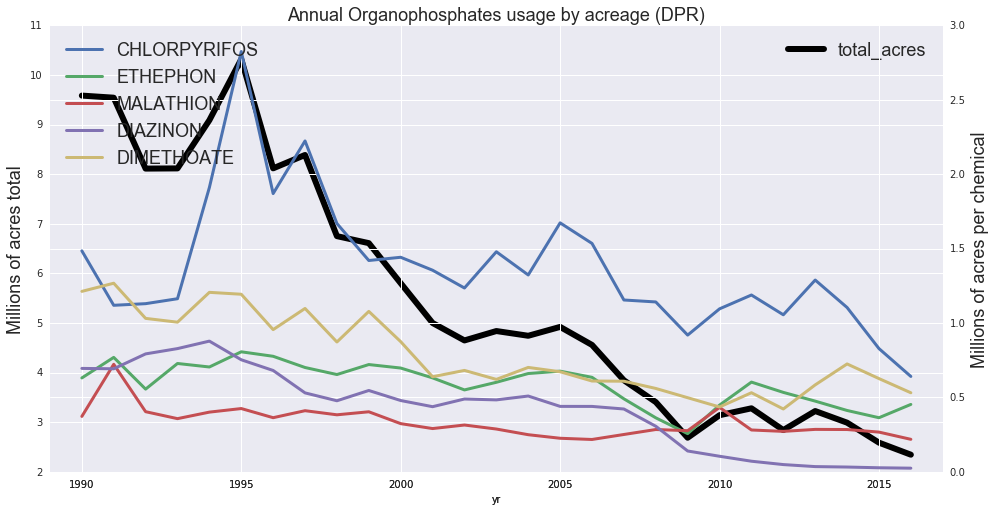

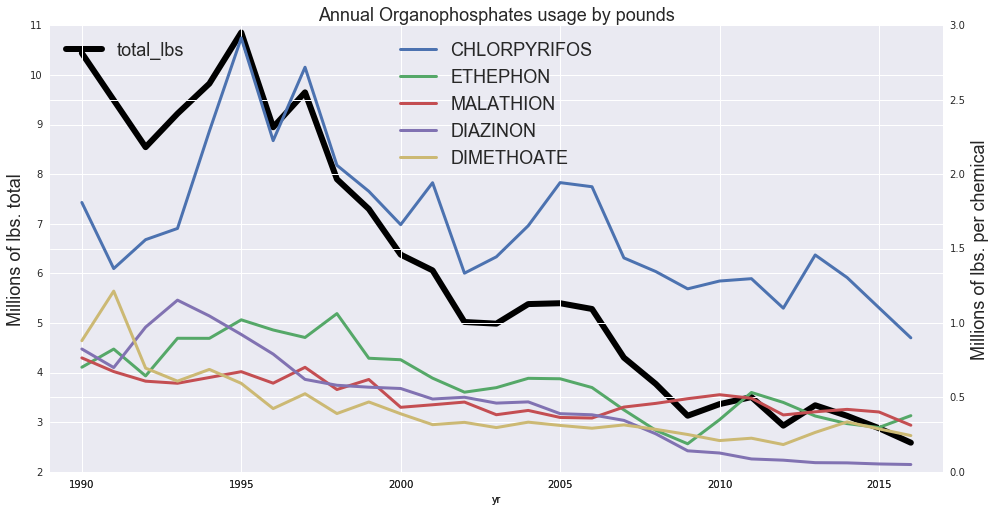

In [23]:
#Organophosphates 
import math
import matplotlib.pyplot as P
import numpy as np
import sys
import pandas as pd
import seaborn as sns
%matplotlib inline

OP_keep = [253,1626,367,198,216]


pesticide_plotter("OP_yr_mo.data", "Organophosphates", OP_keep)

## Chlorpyrifos = a product of Dow Agrosciences
## registered for use in the US since 1965


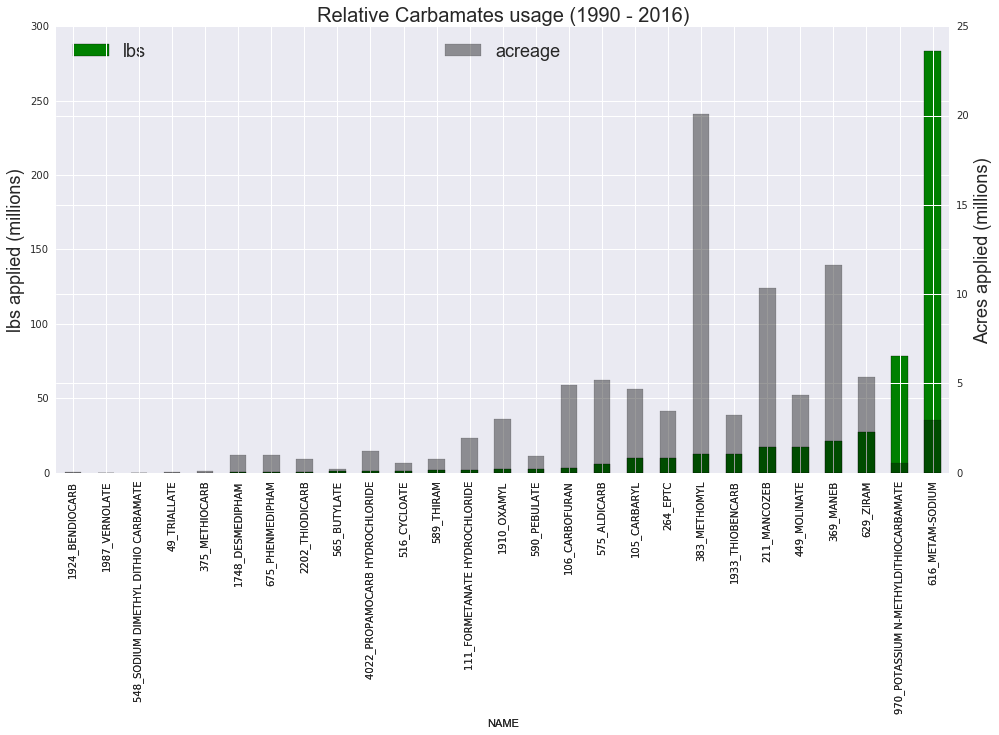

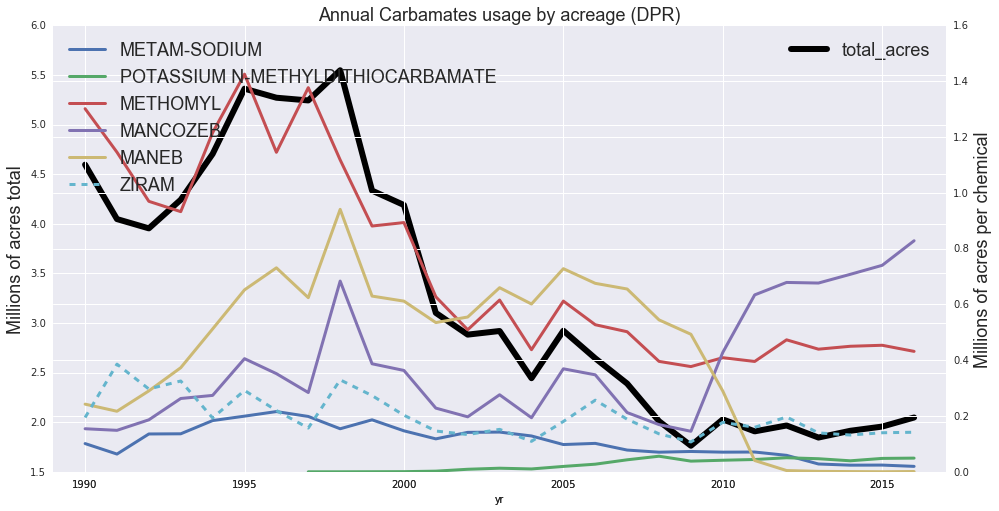

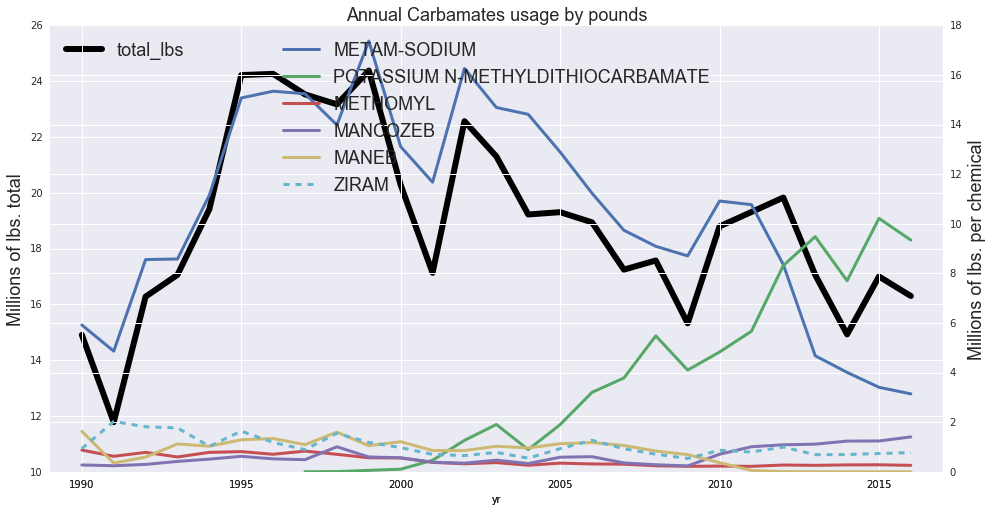

In [25]:
#Carbamates 
import math
import matplotlib.pyplot as P
import numpy as np
import sys
import pandas as pd
import seaborn as sns
%matplotlib inline


# keep the important players only
carb_keep = [616,970,383,211,369,629]

pesticide_plotter("carb_yr_mo.data", "Carbamates", carb_keep)

## Methomyl is highly toxic to humans and mammals.

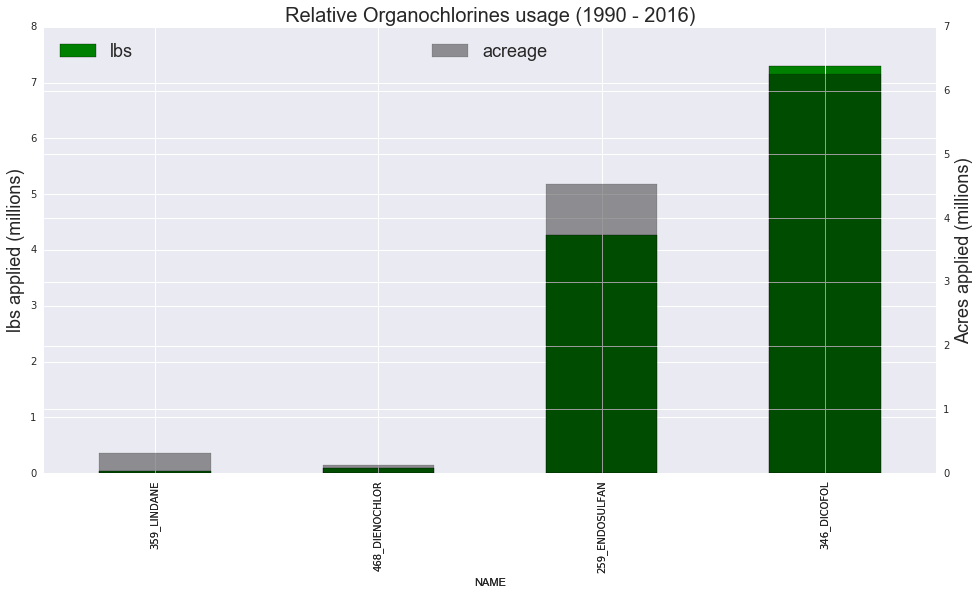

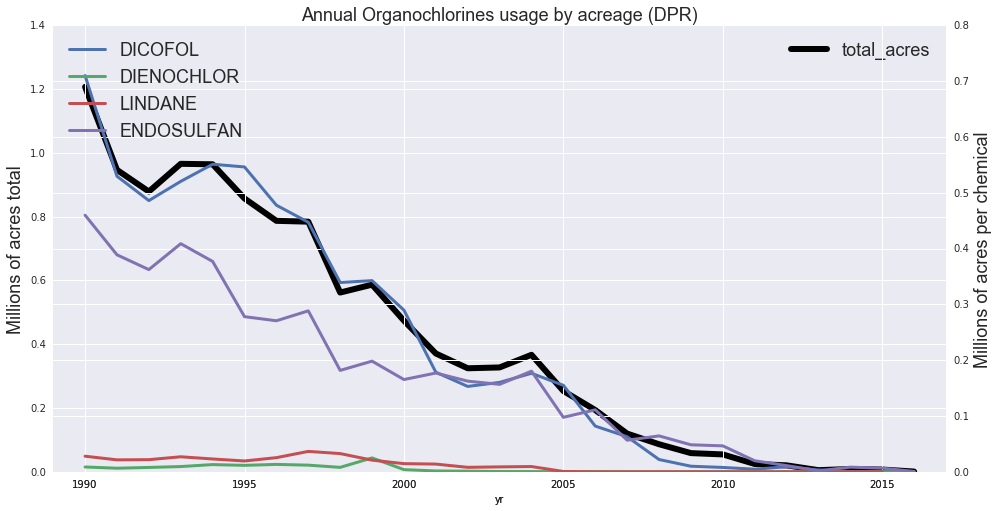

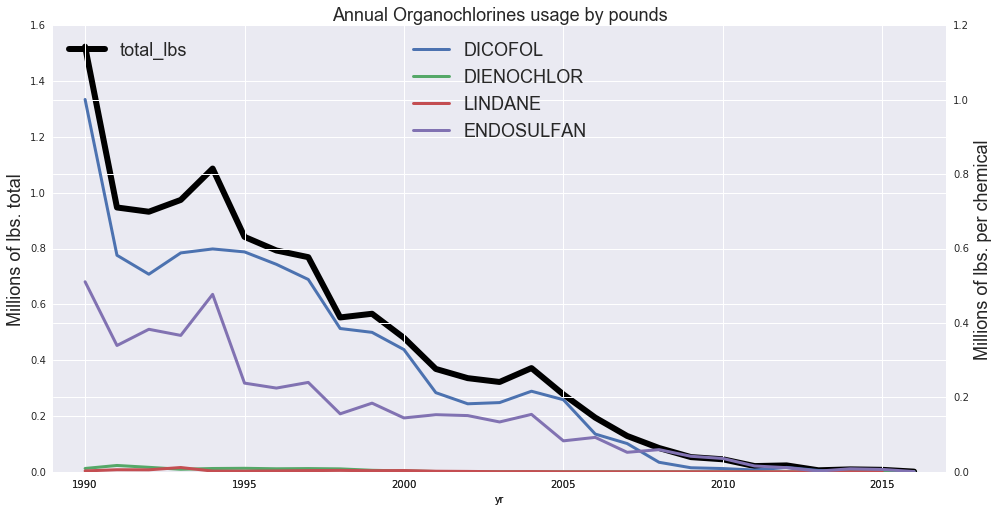

In [27]:
# Organochlorine
import math
import matplotlib.pyplot as P
import numpy as np
import sys
import pandas as pd
import seaborn as sns
%matplotlib inline



OC_keep = [346,468,359,259]#Here is a list of the top 4 OC's

pesticide_plotter("OC_yr_mo.data", "Organochlorines", OC_keep)

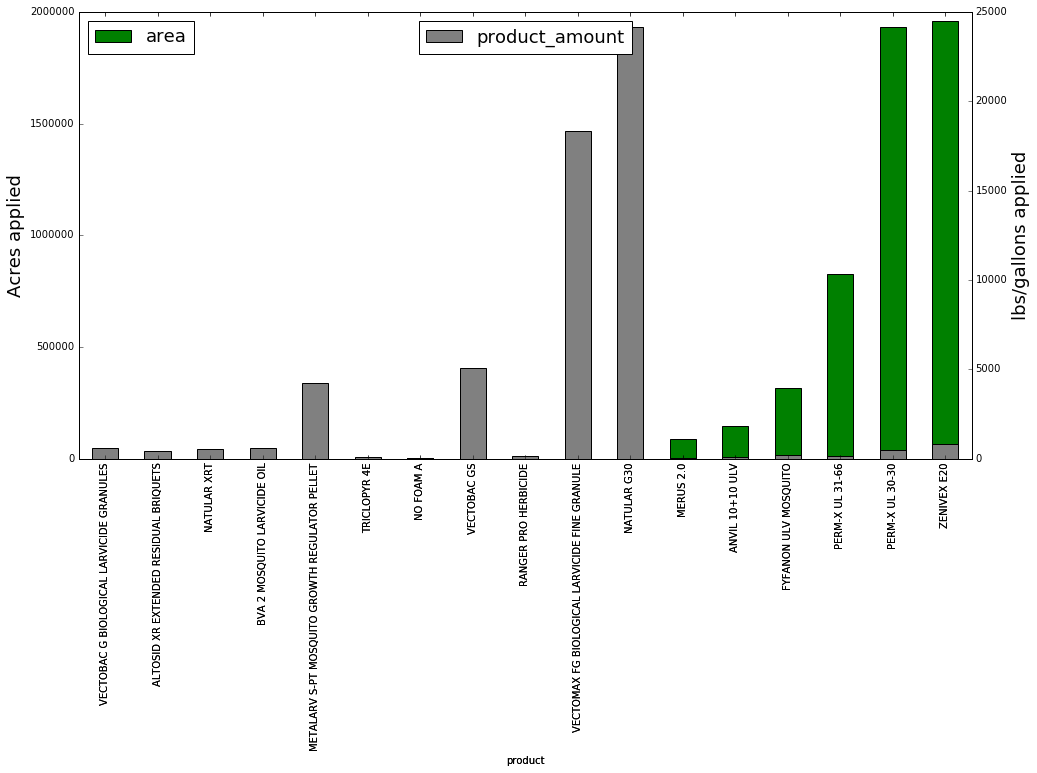

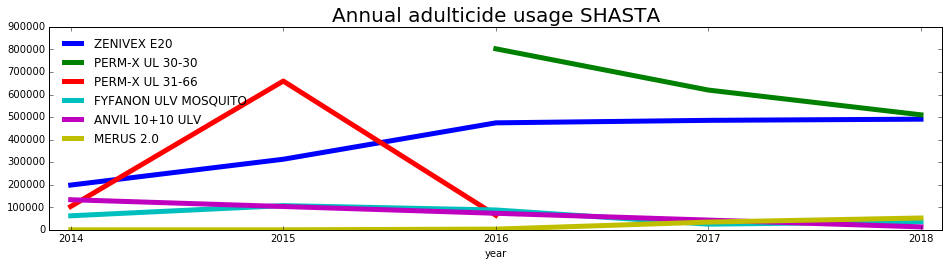

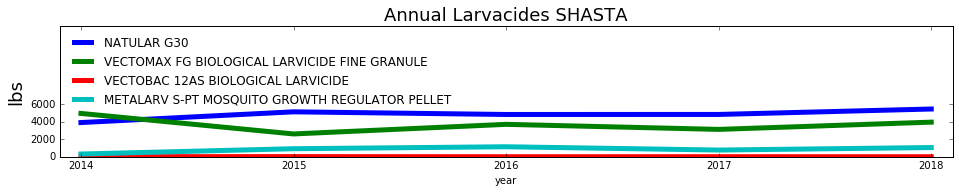

In [17]:
# SHASTA Vector control data

import matplotlib.pyplot as P
import pandas as pd
%matplotlib inline

#create figures
fig1 = P.figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')
fig2 = P.figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')
fig3 = P.figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')

# Fig 1 populated with acreage and lbs data 
ax1 = fig1.add_subplot(111)
ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax1.yaxis.tick_left()
ax1.yaxis.set_label_position("left")

# annual adulticide data 
ax3 = fig2.add_subplot(211)

# annual larvicide data 
ax4 = fig3.add_subplot(311)

# Input shasta data
df = pd.read_csv("shasta.csv")
#PURPOSE = list(set(df['purpose'].tolist()))
#U = list(set(df['area_unit'].tolist()))

total = df.groupby('product').sum()
total = total.reset_index()

top_products = total.loc[(total['area']>1000) | (total['product_amount']>400)] # Filter out low use chemicals

product_sorted_df = top_products.sort_values(by=['area'])
product_sorted_df = product_sorted_df.reset_index()


product_sorted_df.plot(kind='bar',x='product',y='area', ax=ax1, color='green')
product_sorted_df.plot(kind='bar',x='product',y='product_amount', ax=ax2, color='gray')

# Fig 2 annual usage trends
ax3 = fig2.add_subplot(211)
df['date'] = df.start_time.str.split(expand=True)[0]
df['year'] = df.date.str.split("-",expand=True)[0]
df["year"] = pd.to_numeric(df["year"]) # add year column

adulticides = total.loc[total['area']>10000] # basically all products that have high acreage
adulticides_sorted = adulticides.sort_values(by=['area'],ascending=False)
prod_list = adulticides_sorted['product'].tolist()

# plot each adulticide product
for prod in prod_list:
    product_specific = df.loc[df['product']== prod]
    product_annual = product_specific.groupby('year').sum()
    product_annual = product_annual.reset_index()
    product_annual.plot(kind='line',x='year',y='area', ax=ax3,lw=5,label=prod) 

#larvicides = total.loc[total['area']<10000] # basically all products that have low acreage
#larvicides_sorted = larvicides.sort_values(by=['area'],ascending=False)
#larv_prod_list = larvicides_sorted['product'].tolist()
#print(larv_prod_list)
larv_prod_list = ['NATULAR G30', 'VECTOMAX FG BIOLOGICAL LARVICIDE FINE GRANULE', 'VECTOBAC 12AS BIOLOGICAL LARVICIDE', 'METALARV S-PT MOSQUITO GROWTH REGULATOR PELLET']
# plot each larvicide product
for L_prod in larv_prod_list:
    product_specific = df.loc[df['product']== L_prod]
    product_annual = product_specific.groupby('year').sum()
    product_annual = product_annual.reset_index()
    product_annual.plot(kind='line',x='year',y='product_amount', ax=ax4,lw=5,label=L_prod) 

# clean up x ticks
ax3.set_xlim(2013.9,2018.1)
ax3.set_xticks([2014, 2015, 2016, 2017, 2018])
ax3.ticklabel_format(useOffset=False, style='plain')
ax3.legend(frameon=False, loc=2)

# clean up x ticks
ax4.set_xlim(2013.9,2018.1)
ax4.set_xticks([2014, 2015, 2016, 2017, 2018])
ax4.ticklabel_format(useOffset=False, style='plain')
ax4.legend(frameon=False, loc=2)
ax4.set_yticks([0, 2000, 4000, 6000])
ax4.set_ylabel("lbs", fontsize=18)
ax4.set_ylim(0,15000)
ax4.set_title("Annual Larvacides SHASTA", fontsize=18)

ax2.legend(loc=9, fontsize=18)
ax1.legend(loc=2, fontsize=18)
ax1.set_ylabel("Acres applied", fontsize=18)
ax2.set_ylabel("lbs/gallons applied", fontsize=18)

ax3.set_title("Annual adulticide usage SHASTA", fontsize=20)



#### Natular G30 is 30 day spinosyn larvacide release pellets. 
#### Spinosyns target the nicotinic acetylcholine receptors (nAChRs) --> hyper excitation.

#### Vectomax FG = BTI
#### VECTOBAC GS = granular formulations of Bacillus thuringiensis subsp. israelensis 
## For adults:
#### Zenivex E20 = ETOFENPROX. Non–Ester Pyrethroid. Relatively low toxicity
#### Perm-X 30-30 = 30% permethrin and 30% PBO
#### Perm-X 31-66 = 31% permethrin and 66% PBO
#### FYFANON ULV MOSQUITO = 96.5% Malathion (OP)
#### ANVIL 10+10 = 10% SUMITHRIN (~ permethrin) and 10% PBO. CLARKE 
#### MERUS 2.0 = pyrethrin for organic farms. CLARKE (5%??)

In [25]:
# SHASTA Vector control data vs big Ag.

import matplotlib.pyplot as P
import pandas as pd
%matplotlib inline

def compare_ag_vectorcontrol(VC_data, VC_prod_list, DPR_data_by_class,pesticide_class, county_code):
    #create figures
    fig1 = P.figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')
    ax1 = fig1.add_subplot(111)
    ax1.yaxis.tick_left()
    ax1.yaxis.set_label_position("left")


    # Input shasta data
    #df = pd.read_csv("shasta.csv")
    df = pd.read_csv(VC_data)

    # Fig 1 annual pyr usage abatement vs. BIG Ag.
    ax1 = fig1.add_subplot(111)
    df['date'] = df.start_time.str.split(expand=True)[0]
    df['year'] = df.date.str.split("-",expand=True)[0]
    df["year"] = pd.to_numeric(df["year"]) # add year column


    #prod_list = ['ZENIVEX E20', 'PERM-X UL 30-30', 'PERM-X UL 31-66', 'ANVIL 10+10 ULV', 'MERUS 2.0']
    shasta_pyr = df.loc[df['product'].isin(VC_prod_list)]
    #print(shasta_pyr)
    pyr_annual = shasta_pyr.groupby('year').sum()
    pyr_annual = pyr_annual.reset_index()
    pyr_annual.plot(kind='line',x='year',y='area', ax=ax1,lw=5,label="Vector control") 



    # Make a dictionary of acreage in SHASTA (code 45) DPR data
    D = {}
    total = 0

    for line in open(DPR_data_by_class): # this file has been filtered by pyrethroids based on dpr CLASS file.
        i=line.strip().split(",")

        yr = i[13].split('/')[-1]
        if yr == '' or int(yr)<2014 or int(yr)>2016:
            continue # yes some applications have no year.
        if yr not in D:
            D[yr]=0
        county = i[15]
        if county==county_code: #SHASTA is 45
            unit_trt = i[11]
            if i[10]=='': # skip entries with no data
                continue
            if unit_trt == "S": # square ft.
                acres = float(i[10])/43560
            elif unit_trt == "A":
                acres = float(i[10])
            else:
                continue
            D[yr]+=acres # sum up all pyrethroid applications


    dpr_year = []
    dpr_pyr = []
    for Y in sorted(D):
            dpr_year.append(Y)
            dpr_pyr.append(D[Y])


    ax1.plot(dpr_year,dpr_pyr, label="Ag", linestyle='-.',lw=5)

    # clean up x ticks
    ax1.set_xlim(2013.9,2018.1)
    ax1.set_xticks([2014, 2015, 2016, 2017, 2018])
    ax1.ticklabel_format(useOffset=False, style='plain')
    ax1.legend()
    P.title("Relative %s usage in Ag. vs. vector control in Shasta County" % (pesticide_class), fontsize=18)
    P.ylabel("acres applied", fontsize=18)
    P.semilogy()
    P.show()






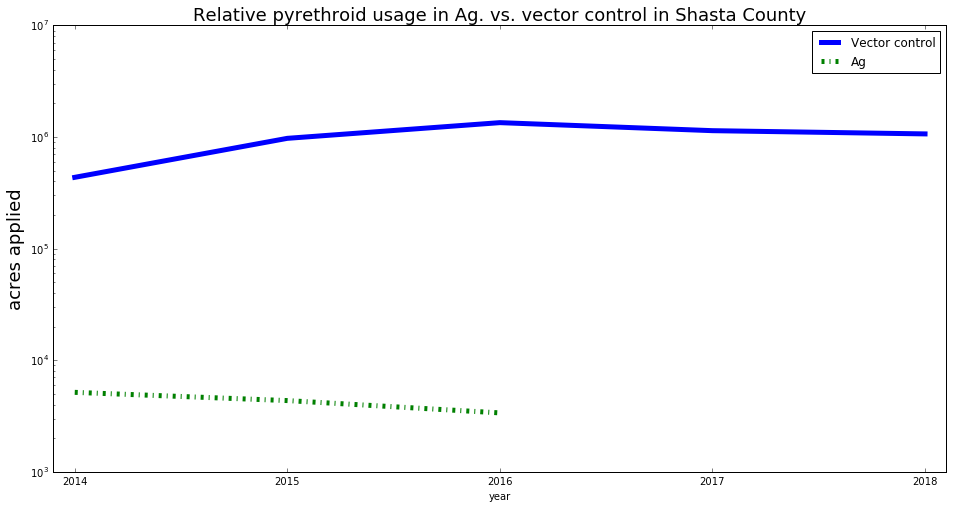

In [26]:
# pyrethroids
import matplotlib.pyplot as P
import pandas as pd
%matplotlib inline
#def compare_ag_vectorcontrol(VC_data, VC_prod_list, DPR_data_by_class,pesticide_class, county_code):
VC_pyr = ['ZENIVEX E20', 'PERM-X UL 30-30', 'PERM-X UL 31-66', 'ANVIL 10+10 ULV', 'MERUS 2.0']
compare_ag_vectorcontrol("shasta.csv", VC_pyr, "pyrethroid.pur", "pyrethroid", "45")

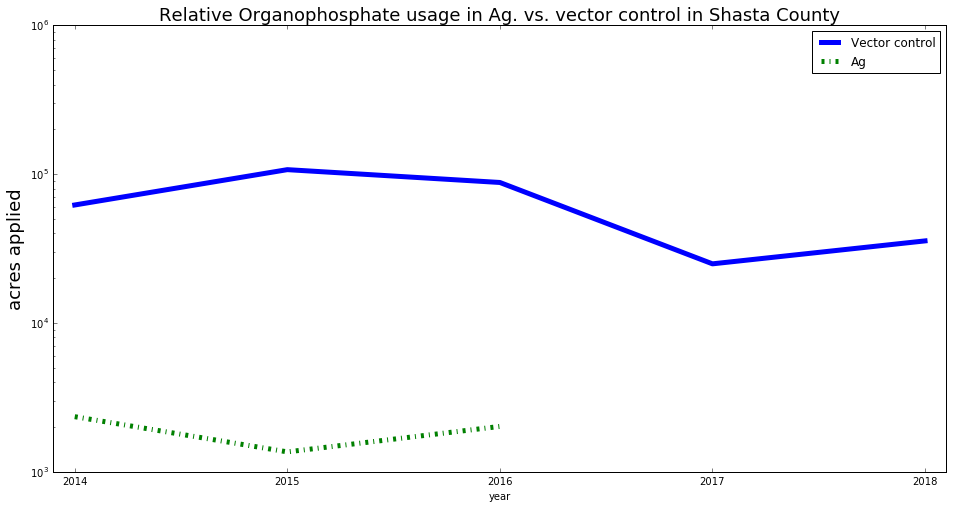

In [27]:
# Organophosphates
import matplotlib.pyplot as P
import pandas as pd
%matplotlib inline
#def compare_ag_vectorcontrol(VC_data, VC_prod_list, DPR_data_by_class,pesticide_class, county_code):
VC_OP = ['FYFANON ULV MOSQUITO']
compare_ag_vectorcontrol("shasta.csv", VC_OP, "OP.pur", "Organophosphate", "45")

## Gross Ag. value in 2016
####    $1,000 (Rank)
#### Kern 7,187,938 (1) 
#### Colusa 791,666 (17)
#### Yolo 662,392 (21) 
#### Shasta 81,133 (41) 
#### Placer 61,106 (42)


In [ ]:
# multiple Vector control data vs big Ag.

import matplotlib.pyplot as P
import pandas as pd
%matplotlib inline

def compare_ag_multiple_vectorcontrol(VC_data, VC_prod_list, county_abbr, DPR_data_by_class,pesticide_class, dpr_county_code):
    #create figures
    fig1 = P.figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')
    ax1 = fig1.add_subplot(111)
    ax1.yaxis.tick_left()
    ax1.yaxis.set_label_position("left")


    # Input shasta data
    #df = pd.read_csv("shasta.csv")
    df = pd.read_csv(VC_data)

    # Fig 1 annual pyr usage abatement vs. BIG Ag.
    ax1 = fig1.add_subplot(111)
    df['date'] = df.start_time.str.split(expand=True)[0]
    df['year'] = df.date.str.split("-",expand=True)[0]
    df["year"] = pd.to_numeric(df["year"]) # add year column


    #prod_list = ['ZENIVEX E20', 'PERM-X UL 30-30', 'PERM-X UL 31-66', 'ANVIL 10+10 ULV', 'MERUS 2.0']
    shasta_pyr = df.loc[df['product'].isin(VC_prod_list)]
    #print(shasta_pyr)
    pyr_annual = shasta_pyr.groupby('year').sum()
    pyr_annual = pyr_annual.reset_index()
    pyr_annual.plot(kind='line',x='year',y='area', ax=ax1,lw=5,label="Vector control") 



    # Make a dictionary of acreage in SHASTA (code 45) DPR data
    D = {}
    total = 0

    for line in open(DPR_data_by_class): # this file has been filtered by pyrethroids based on dpr CLASS file.
        i=line.strip().split(",")

        yr = i[13].split('/')[-1]
        if yr == '' or int(yr)<2014 or int(yr)>2016:
            continue # yes some applications have no year.
        if yr not in D:
            D[yr]=0
        county = i[15]
        if county==county_code: #SHASTA is 45
            unit_trt = i[11]
            if i[10]=='': # skip entries with no data
                continue
            if unit_trt == "S": # square ft.
                acres = float(i[10])/43560
            elif unit_trt == "A":
                acres = float(i[10])
            else:
                continue
            D[yr]+=acres # sum up all pyrethroid applications


    dpr_year = []
    dpr_pyr = []
    for Y in sorted(D):
            dpr_year.append(Y)
            dpr_pyr.append(D[Y])


    ax1.plot(dpr_year,dpr_pyr, label="Ag", linestyle='-.',lw=5)

    # clean up x ticks
    ax1.set_xlim(2013.9,2018.1)
    ax1.set_xticks([2014, 2015, 2016, 2017, 2018])
    ax1.ticklabel_format(useOffset=False, style='plain')
    ax1.legend()
    P.title("Relative %s usage in Ag. vs. vector control in Shasta County" % (pesticide_class), fontsize=18)
    P.ylabel("acres applied", fontsize=18)
    P.semilogy()
    P.show()






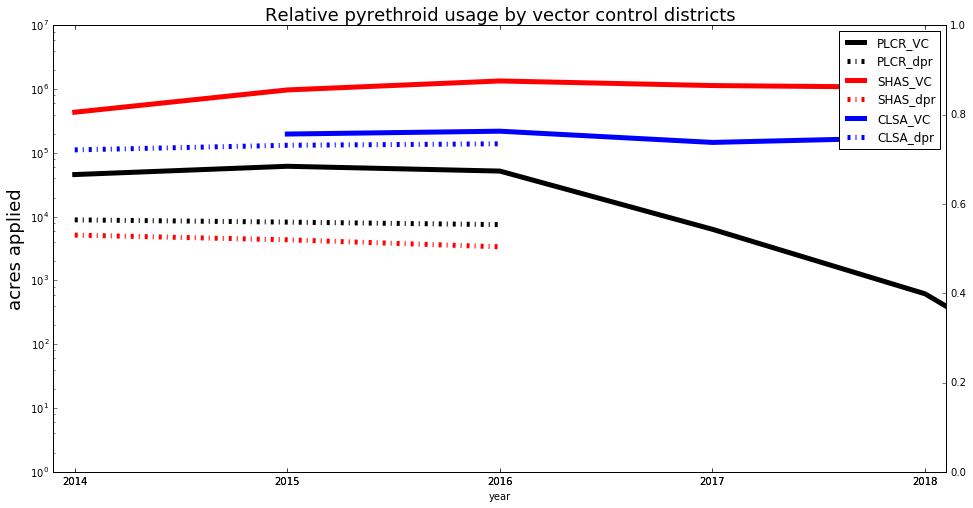

In [30]:
#  Vector control data

import matplotlib.pyplot as P
import pandas as pd
%matplotlib inline

#create figures
fig1 = P.figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')

# Fig 1 populated with acreage and lbs data 
ax1 = fig1.add_subplot(111)
ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax1.yaxis.tick_left()
ax1.yaxis.set_label_position("left")


# Input  data
df = pd.read_csv("EXPORT_PLCR_jody_1556053940.csv")
df['date'] = df.start_time.str.split(expand=True)[0]
df['year'] = df.date.str.split("-",expand=True)[0]
df["year"] = pd.to_numeric(df["year"]) # add year column

district_list = ['PLCR', 'SHAS', 'CLSA']
#print(len(df))
df_adult = df.loc[df['purpose']=="Adulticide"]
#print(list(set(df_adult['product'].tolist())))
pyrethroids = ['PERMANONE 31-66', 'ANVIL 10+10 ULV', 'WISDOM TC FLOWABLE', 'TEMPO SC ULTRA', 
               'MAVRIK PERIMETER', 'ZENIVEX E20', 'ZENIVEX E4 RTU', 'PERM-X UL 31-66', 'SUSPEND SC INSECTICIDE', 
               'PERMANONE READY-TO-USE INSECTICIDE', 'MASTER LABEL - EVERGREEN CROP PROTECTION EC 60-6', 
               'PRENTOX PYRONYL OIL CONCENTRATE #525', 'DUET DUAL-ACTION ADULTICIDE', 'KONTROL 4-4', 
               'DELTAGARD INSECTICIDE', 'LAMBDA 9.7 CS', 'PERM-X UL 30-30', 'MERUS 2.0']
#beta-cyfluthrin = 'TEMPO SC ULTRA'
# methoprene juv hormone = 'ALTOSID IGR 1% LIQUID',
# Etofenprox = 'ZENIVEX E4 RTU'
# 'PRODUCT 492' = ???
# 'PRODUCT 490' = ???
# 'TRUMPET EC INSECTICIDE' = naled
OP = ['FYFANON ULV MOSQUITO','TRUMPET EC INSECTICIDE']

#sb = df.loc[df['code']=="SBVC"]
#print(sb)
county_code_D = {'PLCR':'31', 'SHAS':'45', 'CLSA':'06'}
color_list = ['k','r','b']
counter=-1
for dist in district_list:
    counter+=1
    dist_specific = df_adult.loc[df_adult['code']==dist]
    dist_pyr = dist_specific.loc[dist_specific['product'].isin(pyrethroids)]
    dist_annual = dist_pyr.groupby('year').sum()
    dist_annual = dist_annual.reset_index()
    dist_annual.plot(kind='line',x='year',y='area', ax=ax1,lw=5,label="_".join([dist,"VC"]), color=color_list[counter]) 
    dpr_D={}
    for line in open("pyrethroid.pur"): # this file has been filtered by pyrethroids based on dpr CLASS file.
        i=line.strip().split(",")
        yr = i[13].split('/')[-1]
        if yr == '' or int(yr)<2014 or int(yr)>2016:
            continue # yes some applications have no year.
        if yr not in dpr_D:
            dpr_D[yr]=0
        county = i[15]
        if county==county_code_D[dist]: #SHASTA is 45
            unit_trt = i[11]
            if i[10]=='': # skip entries with no data
                continue
            if unit_trt == "S": # square ft.
                acres = float(i[10])/43560
            elif unit_trt == "A":
                acres = float(i[10])
            else:
                continue
            dpr_D[yr]+=acres # sum up all pyrethroid applications

    dpr_year = []
    dpr_pyr = []
    for Y in sorted(dpr_D):
            dpr_year.append(Y)
            dpr_pyr.append(dpr_D[Y])
    ax1.plot(dpr_year,dpr_pyr, label="_".join([dist,"dpr"]), linestyle='-.',lw=5, color=color_list[counter])

# clean up x ticks
ax1.set_xlim(2013.9,2018.1)
ax1.set_xticks([2014, 2015, 2016, 2017, 2018])
ax1.ticklabel_format(useOffset=False, style='plain')
ax1.legend()
ax1.set_title("Relative pyrethroid usage by vector control districts" , fontsize=18)
ax1.set_ylabel("acres applied", fontsize=18)
ax1.semilogy()
P.show()
   


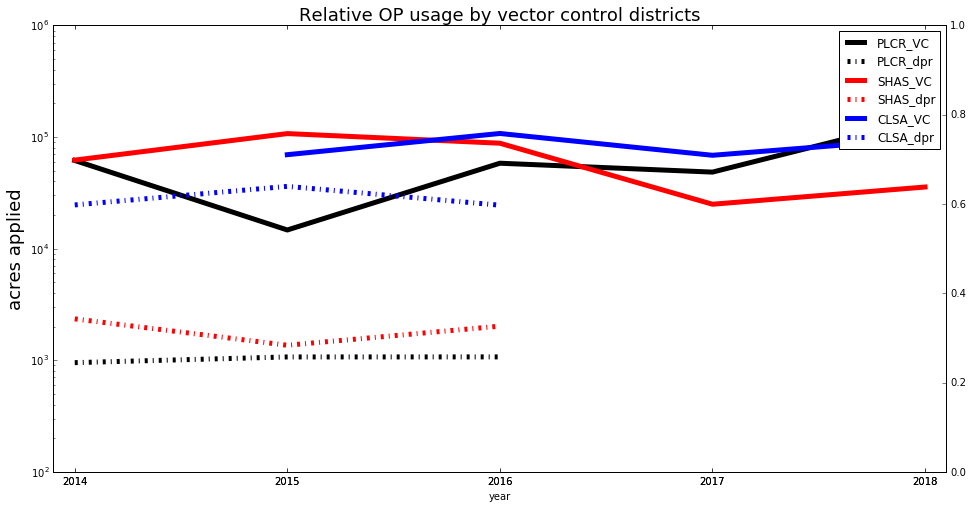

In [31]:
#  Vector control data

import matplotlib.pyplot as P
import pandas as pd
%matplotlib inline

#create figures
fig1 = P.figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')

# Fig 1 populated with acreage and lbs data 
ax1 = fig1.add_subplot(111)
ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax1.yaxis.tick_left()
ax1.yaxis.set_label_position("left")


# Input  data
df = pd.read_csv("EXPORT_PLCR_jody_1556053940.csv")
df['date'] = df.start_time.str.split(expand=True)[0]
df['year'] = df.date.str.split("-",expand=True)[0]
df["year"] = pd.to_numeric(df["year"]) # add year column

district_list = ['PLCR', 'SHAS', 'CLSA']
#print(len(df))
df_adult = df.loc[df['purpose']=="Adulticide"]
#print(list(set(df_adult['product'].tolist())))
pyrethroids = ['PERMANONE 31-66', 'ANVIL 10+10 ULV', 'WISDOM TC FLOWABLE', 'TEMPO SC ULTRA', 
               'MAVRIK PERIMETER', 'ZENIVEX E20', 'ZENIVEX E4 RTU', 'PERM-X UL 31-66', 'SUSPEND SC INSECTICIDE', 
               'PERMANONE READY-TO-USE INSECTICIDE', 'MASTER LABEL - EVERGREEN CROP PROTECTION EC 60-6', 
               'PRENTOX PYRONYL OIL CONCENTRATE #525', 'DUET DUAL-ACTION ADULTICIDE', 'KONTROL 4-4', 
               'DELTAGARD INSECTICIDE', 'LAMBDA 9.7 CS', 'PERM-X UL 30-30', 'MERUS 2.0']
#beta-cyfluthrin = 'TEMPO SC ULTRA'
# methoprene juv hormone = 'ALTOSID IGR 1% LIQUID',
# Etofenprox = 'ZENIVEX E4 RTU'
# 'PRODUCT 492' = ???
# 'PRODUCT 490' = ???
# 'TRUMPET EC INSECTICIDE' = naled
OP = ['FYFANON ULV MOSQUITO','TRUMPET EC INSECTICIDE']

#sb = df.loc[df['code']=="SBVC"]
#print(sb)
county_code_D = {'PLCR':'31', 'SHAS':'45', 'CLSA':'06'}
color_list = ['k','r','b']
counter=-1
for dist in district_list:
    counter+=1
    dist_specific = df_adult.loc[df_adult['code']==dist]
    dist_pyr = dist_specific.loc[dist_specific['product'].isin(OP)]
    dist_annual = dist_pyr.groupby('year').sum()
    dist_annual = dist_annual.reset_index()
    dist_annual.plot(kind='line',x='year',y='area', ax=ax1,lw=5,label="_".join([dist,"VC"]), color=color_list[counter]) 
    dpr_D={}
    for line in open("OP.pur"): # this file has been filtered by pyrethroids based on dpr CLASS file.
        i=line.strip().split(",")
        yr = i[13].split('/')[-1]
        if yr == '' or int(yr)<2014 or int(yr)>2016:
            continue # yes some applications have no year.
        if yr not in dpr_D:
            dpr_D[yr]=0
        county = i[15]
        if county==county_code_D[dist]: #SHASTA is 45
            unit_trt = i[11]
            if i[10]=='': # skip entries with no data
                continue
            if unit_trt == "S": # square ft.
                acres = float(i[10])/43560
            elif unit_trt == "A":
                acres = float(i[10])
            else:
                continue
            dpr_D[yr]+=acres # sum up all pyrethroid applications

    dpr_year = []
    dpr_pyr = []
    for Y in sorted(dpr_D):
            dpr_year.append(Y)
            dpr_pyr.append(dpr_D[Y])
    ax1.plot(dpr_year,dpr_pyr, label="_".join([dist,"dpr"]), linestyle='-.',lw=5, color=color_list[counter])

# clean up x ticks
ax1.set_xlim(2013.9,2018.1)
ax1.set_xticks([2014, 2015, 2016, 2017, 2018])
ax1.ticklabel_format(useOffset=False, style='plain')
ax1.legend()
ax1.set_title("Relative OP usage by vector control districts" , fontsize=18)
ax1.set_ylabel("acres applied", fontsize=18)
ax1.semilogy()
P.show()
   
